Stefannus Christian 202000138 (NIM Genap)

In [82]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Projek A

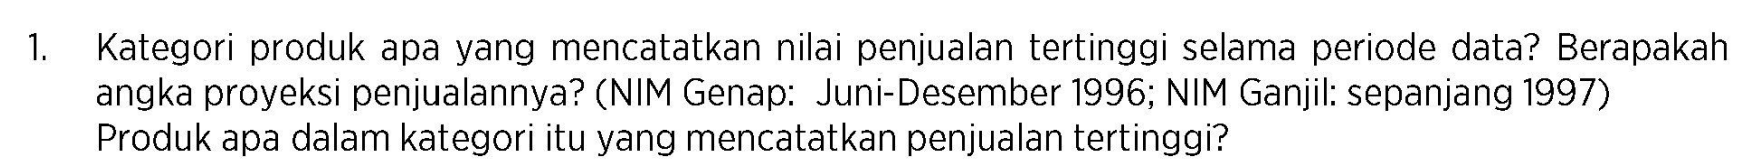

## Kategori produk dengan nilai penjualan tertinggi

In [83]:
dates = {
    "Jan":1,
    "Feb":2,
    "Mar":3,
    "Apr":4,
    "May":5,
    "Jun":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12
}

def convert_date(date: str, info):
    d,m,y = date.split('-')
    if info == 'day':
        return int(d)
    elif info == 'month':
        return dates[m]
    elif info == 'year':
        return int('19'+y)

In [84]:
categories = pd.read_csv('./Northwind_csv/Categories.csv',delimiter=';')
customers = pd.read_csv('./Northwind_csv/Customers.csv',delimiter=';')
employees = pd.read_csv('./Northwind_csv/Employees.csv',delimiter=';')
order_details = pd.read_csv('./Northwind_csv/OrderDetails.csv',delimiter=';')
orders = pd.read_csv('./Northwind_csv/Orders.csv',delimiter=';')
products = pd.read_csv('./Northwind_csv/Products.csv',delimiter=';')
shippers = pd.read_csv('./Northwind_csv/Shippers.csv',delimiter=';')
suppliers = pd.read_csv('./Northwind_csv/Suppliers.csv',delimiter=';')

In [85]:
orders["Order Date Day"] = orders['Order Date'].apply(lambda x: convert_date(x,'day'))
orders["Order Date Month"] = orders['Order Date'].apply(lambda x: convert_date(x,'month'))
orders["Order Date Year"] = orders['Order Date'].apply(lambda x: convert_date(x,'year'))

In [86]:
def clean_unit_price(unit_price): 
    unit_price = unit_price[1:]
    unit_price = unit_price.replace(',','.')
    return float(unit_price)

def clean_discount(discount):
    discount = discount[:-1]
    discount = discount.replace(',','.')
    return float(discount)

order_details["Unit Price"] = order_details["Unit Price"].apply(lambda x: clean_unit_price(x))

In [87]:
order_details["Discount"] = order_details["Discount"].apply(lambda x: clean_discount(x))

In [88]:
order_details["Nilai Penjualan"] = order_details["Unit Price"] * order_details["Quantity"] * (1-(order_details["Discount"]/100))

In [89]:
products["Unit Price"] = products["Unit Price"].apply(lambda x: clean_unit_price(x))

In [90]:
order_order_details = orders.merge(order_details,left_on="Order ID",right_on="Order ID")

In [91]:
order_order_details_products = order_order_details.merge(products.drop(["Unit Price"],axis=1),left_on="Product",right_on="Product Name")
order_order_details_products.groupby(["Category"]).sum().sort_values('Nilai Penjualan',ascending=False)

,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price,Quantity,Discount,Nilai Penjualan,ProductID,Units In Stock,Units On Order,Reorder Level,Discontinued
Category,,,,,,,,,,,,,
Beverages,4312144,6346,2371,806085,11811.65,9532,2500.0,267868.1800,16356,18111,2430,6715,51
Dairy Products,3894474,6016,2248,730230,9875.80,9149,1956.0,234507.2850,17806,13424,5310,3640,0
Confections,3557446,5334,1945,666404,7549.30,7906,1902.0,167357.2250,12147,7944,3580,2895,0
Meat/Poultry,1839680,2947,1028,345164,7417.33,4199,1115.0,163022.3595,6951,4696,0,1020,104
Seafood,3523066,5253,2022,658433,6290.78,7681,1988.0,131261.7375,11139,21178,1280,3790,0
Condiments,2303505,3258,1352,430965,4605.30,5298,1137.0,106047.0850,9557,10416,1640,2405,10
Produce,1450501,2147,755,271356,4786.45,2990,618.0,99984.5800,4386,2895,260,745,33
Grains/Cereals,2090139,2731,1171,391069,4164.30,4562,888.0,95744.5875,9567,7096,2900,4435,30


## Produk di Kategori Beverages (kategori dengan nilai penjualan tertinggi) yang memiliki nilai penjualan tertinggi

In [92]:
beverages = order_order_details_products[order_order_details_products["Category"] == "Beverages"]
beverages.groupby(["Product Name"]).sum().sort_values("Nilai Penjualan",ascending=False)

,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price,Quantity,Discount,Nilai Penjualan,ProductID,Units In Stock,Units On Order,Reorder Level,Discontinued
Product Name,,,,,,,,,,,,,
Cte de Blaye,255583,410,120,47887,5902.40,623,110.0,141396.735,912,408,0,360,0
Ipoh Coffee,298531,401,169,55866,1205.20,580,140.0,23526.700,1204,476,280,700,0
Chang,470965,696,245,87795,786.60,1057,450.0,16355.960,88,748,1760,1100,0
Lakkalikri,415841,554,260,77812,662.40,981,205.0,15760.440,2964,2223,0,780,0
Steeleye Stout,383553,552,200,71829,612.00,883,170.0,13644.000,1260,720,0,540,0
Chai,406841,558,243,75821,651.60,828,295.0,12788.100,38,1482,0,380,0
Chartreuse verte,318790,432,174,59855,500.40,793,200.0,12294.540,1170,2070,0,150,0
Outback Lager,416162,673,218,77816,552.00,817,245.0,10672.650,2730,585,390,1170,0
Rhnbru Klosterbier,490967,785,275,91782,339.45,1155,240.0,8177.490,3450,5750,0,1150,0


## Proyeksi Penjualan (Juli - Desember 1996)

In [93]:
order_order_details_products_groupby = order_order_details_products.groupby(["Category","Order Date Year","Order Date Month"]).sum().reset_index()
beverages_products_groupby = order_order_details_products_groupby[(order_order_details_products_groupby["Category"] == "Beverages")]
beverages_products_groupby

,Category,Order Date Year,Order Date Month,Order ID,Order Date Day,Unit Price,Quantity,Discount,Nilai Penjualan,ProductID,Units In Stock,Units On Order,Reorder Level,Discontinued
0,Beverages,1994,8,112857,205,134.40,272,75.0,3182.500,383,336,140,180,2
1,Beverages,1994,9,164550,299,201.00,347,55.0,4866.880,656,827,20,220,4
2,Beverages,1994,10,123689,215,222.20,285,10.0,5088.400,529,526,100,250,0
3,Beverages,1994,11,113604,138,371.40,286,85.0,7971.360,423,433,130,215,0
4,Beverages,1994,12,165680,264,764.40,347,90.0,17378.060,636,913,0,195,3
5,Beverages,1995,1,124627,211,340.40,305,90.0,9431.800,448,420,60,180,2
6,Beverages,1995,2,104160,160,535.20,330,75.0,21904.160,372,298,50,175,0
7,Beverages,1995,3,125344,202,164.00,220,105.0,2845.840,514,662,100,215,1
8,Beverages,1995,4,157116,215,410.20,435,85.0,10413.680,565,576,120,250,3
9,Beverages,1995,5,168167,313,466.20,304,70.0,7297.550,686,716,70,240,4


In [94]:
X = beverages_products_groupby[["Order Date Month","Order Date Year"]].values
y = beverages_products_groupby["Nilai Penjualan"].values
reg = LinearRegression().fit(X,y)
prediction_score = reg.score(X,y)*100

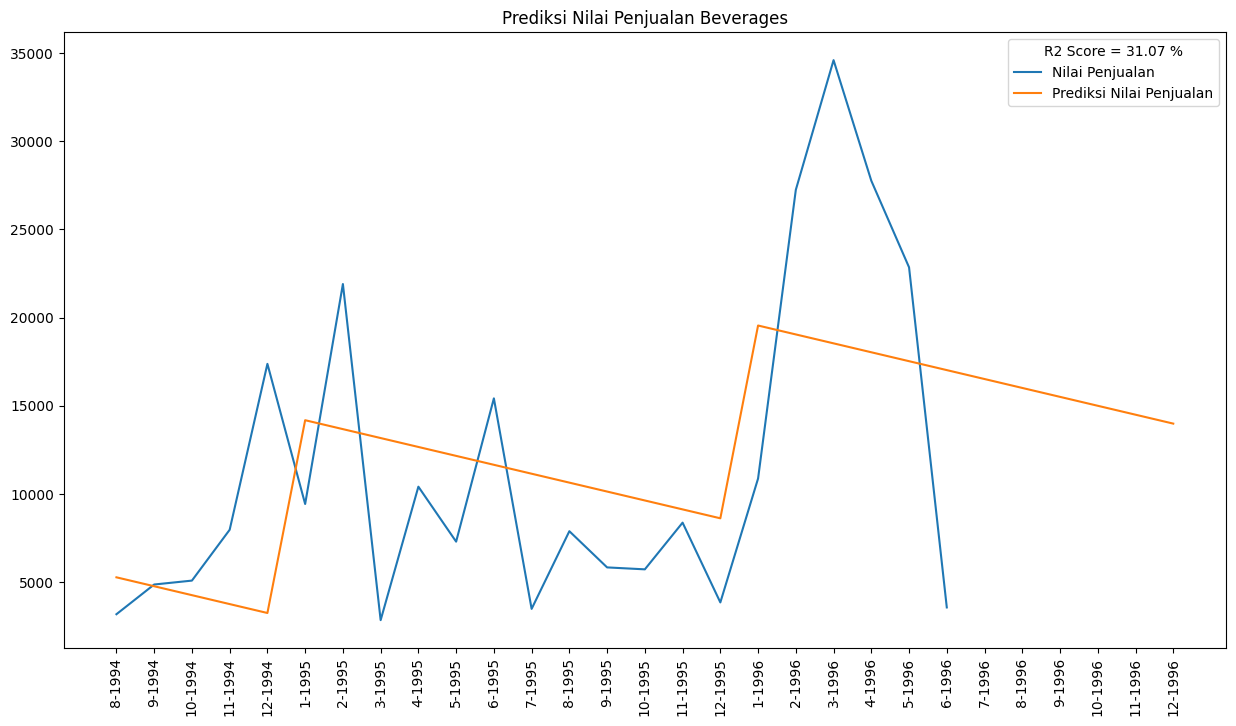

In [95]:
plt.figure(figsize=(15,8))
x_test = np.array([
    [7,1996],
    [8,1996],
    [9,1996],
    [10,1996],
    [11,1996],
    [12,1996]
])

x_concat = np.concatenate((X,x_test),axis=0)

x_label = [f'{i}-{j}' for i,j in x_concat]  
X_label = [f'{i}-{j}' for i,j in X]

prediction = reg.predict(x_concat)

plt.plot(X_label,y,label="Nilai Penjualan")
plt.plot(x_label,prediction,label="Prediksi Nilai Penjualan")
plt.xticks(rotation=90)
plt.legend()
plt.title("Prediksi Nilai Penjualan Beverages")
plt.legend(title=f'R2 Score = {round(prediction_score,2)} %')
plt.show()

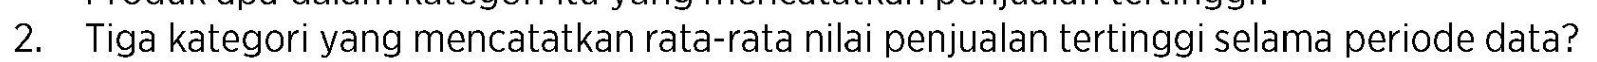

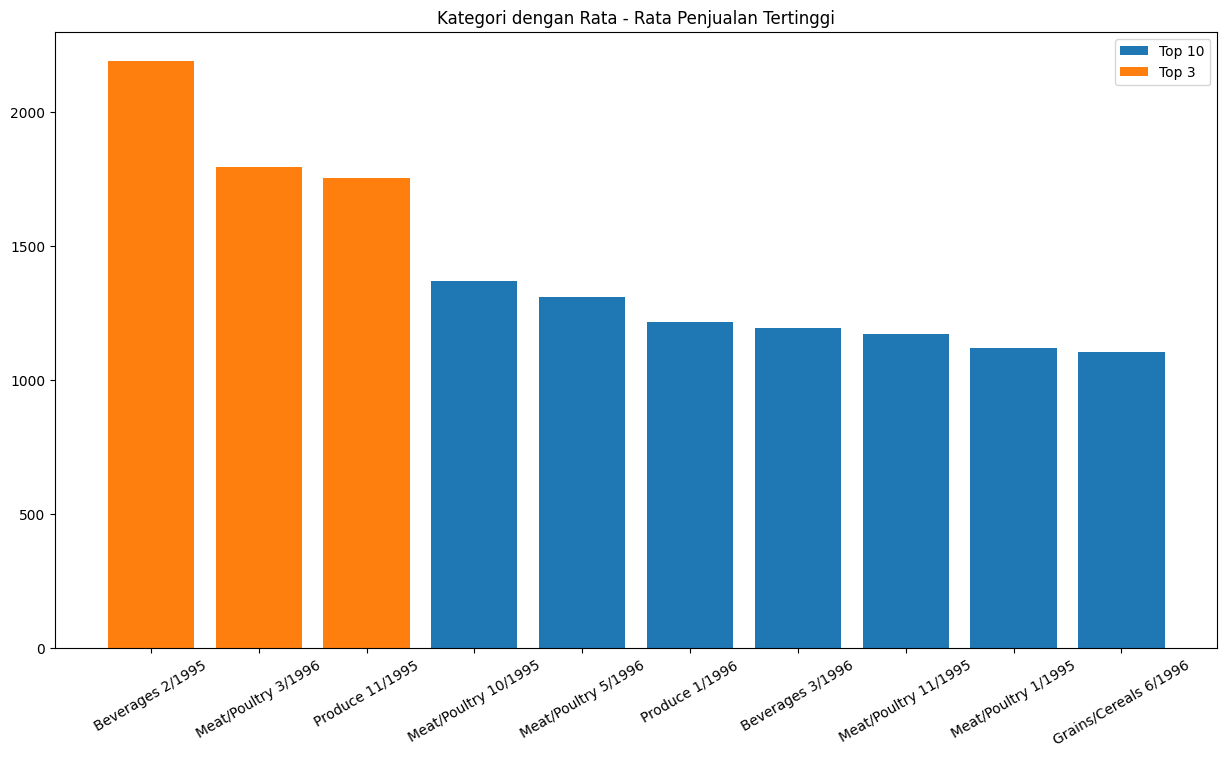

In [96]:
plt.figure(figsize=(15,8))
nomor_2 = order_order_details_products.groupby(["Category","Order Date Year","Order Date Month"]).mean().reset_index().sort_values('Nilai Penjualan',ascending=False).head(10)
nomor_2_tiga_kategori = nomor_2[["Category","Order Date Year","Order Date Month","Nilai Penjualan"]]
cat_year_month_nomor_2 = [f'{i} {k}/{j}' for i,j,k,_ in nomor_2_tiga_kategori.values]
ax = plt.bar(cat_year_month_nomor_2,nomor_2_tiga_kategori["Nilai Penjualan"],label="Top 10")
plt.bar(cat_year_month_nomor_2[:3],nomor_2_tiga_kategori["Nilai Penjualan"][:3],label="Top 3")
plt.xticks(rotation=30)
plt.title("Kategori dengan Rata - Rata Penjualan Tertinggi")
plt.legend()
labels = nomor_2_tiga_kategori["Nilai Penjualan"]
plt.show()

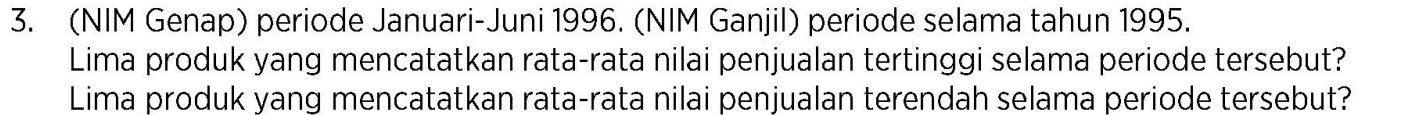

In [97]:
order_order_details_products_jan_june_96 = order_order_details_products[(order_order_details_products["Order Date Year"] == 1996) & (order_order_details_products["Order Date Month"] < 7)]
order_order_details_products_jan_june_96.groupby(["Product Name"]).mean().sort_values('Nilai Penjualan',ascending=False).head()

,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price,Quantity,Discount,Nilai Penjualan,ProductID,Units In Stock,Units On Order,Reorder Level,Discontinued
Product Name,,,,,,,,,,,,,
Cte de Blaye,10873.727273,15.545455,2.636364,1996.0,263.50,25.000000,0.909091,6479.704545,38.0,17.0,0.0,15.0,0.0
Thringer Rostbratwurst,10896.500000,17.785714,2.928571,1996.0,123.79,27.857143,11.785714,2983.339000,29.0,0.0,0.0,0.0,1.0
Raclette Courdavault,10919.062500,16.187500,3.312500,1996.0,55.00,36.125000,3.437500,1867.421875,59.0,79.0,0.0,0.0,0.0
Sir Rodney's Marmalade,10952.857143,13.142857,4.000000,1996.0,81.00,15.857143,2.000000,1243.465714,20.0,40.0,0.0,0.0,0.0
Schoggi Schokolade,10881.750000,15.000000,2.750000,1996.0,43.90,26.250000,0.000000,1152.375000,27.0,49.0,0.0,30.0,0.0


In [98]:
order_order_details_products_jan_june_96.groupby(["Product Name"]).mean().sort_values('Nilai Penjualan',ascending=False).tail()

,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price,Quantity,Discount,Nilai Penjualan,ProductID,Units In Stock,Units On Order,Reorder Level,Discontinued
Product Name,,,,,,,,,,,,,
Rd Kaviar,10979.000000,9.000000,4.500000,1996.0,15.00,6.000000,0.500000,89.850000,73.0,101.0,0.0,5.0,0.0
Tourtire,10880.333333,23.555556,2.444444,1996.0,7.45,14.000000,12.777778,86.875278,54.0,21.0,0.0,10.0,0.0
Chocolade,10814.000000,5.000000,2.000000,1996.0,12.75,8.000000,15.000000,86.700000,48.0,15.0,70.0,25.0,0.0
Filo Mix,10926.076923,11.153846,3.615385,1996.0,7.00,12.461538,5.769231,78.319231,52.0,38.0,0.0,25.0,0.0
Geitost,10940.000000,19.000000,3.600000,1996.0,2.50,20.200000,4.500000,47.662500,33.0,112.0,0.0,20.0,0.0


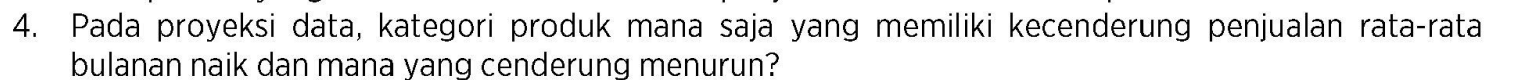

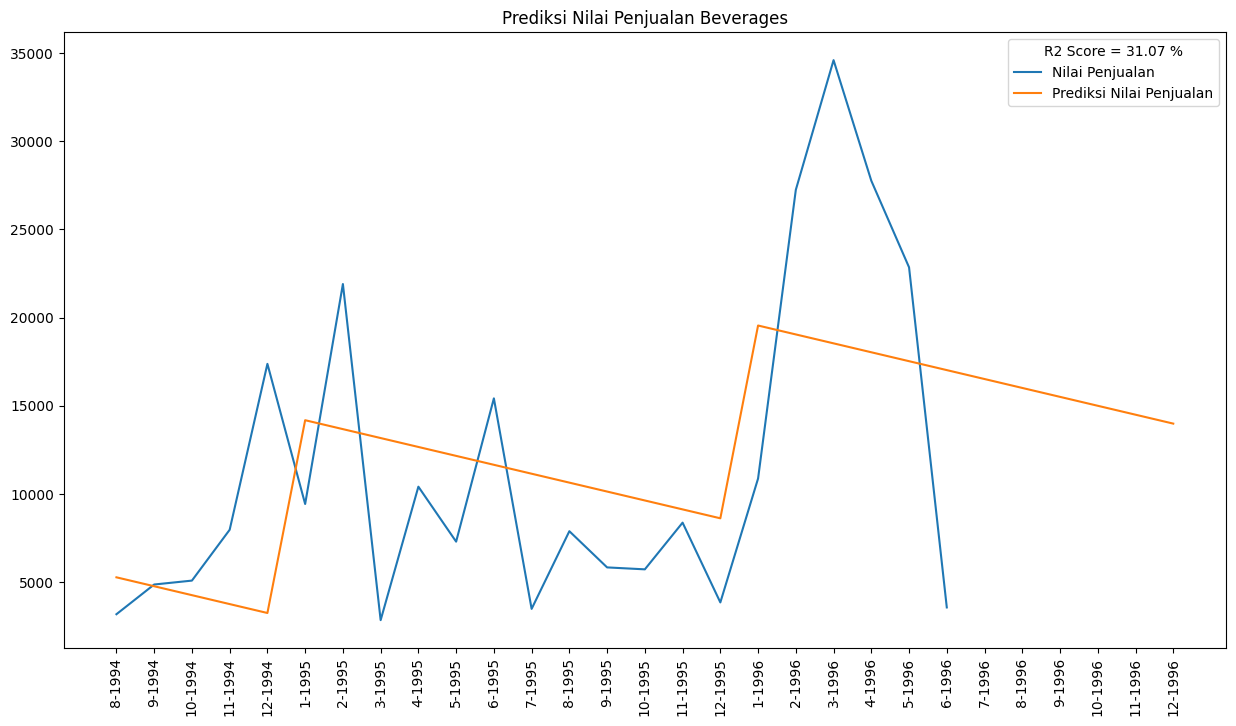

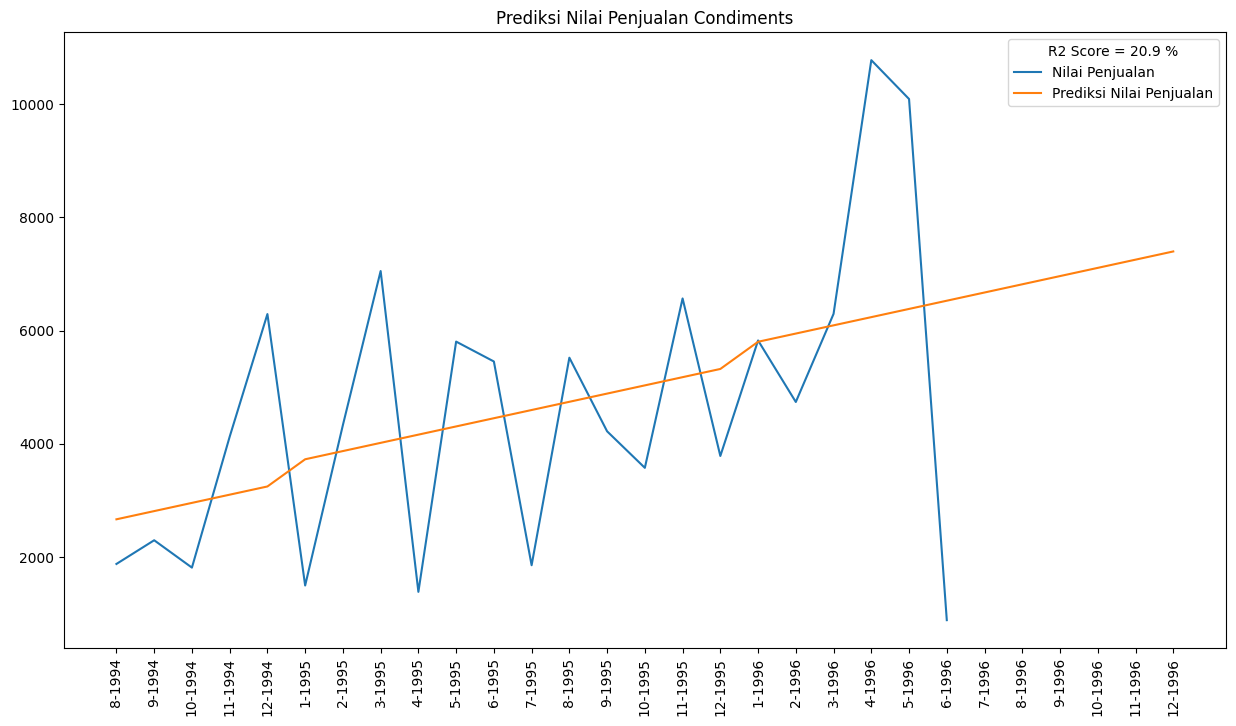

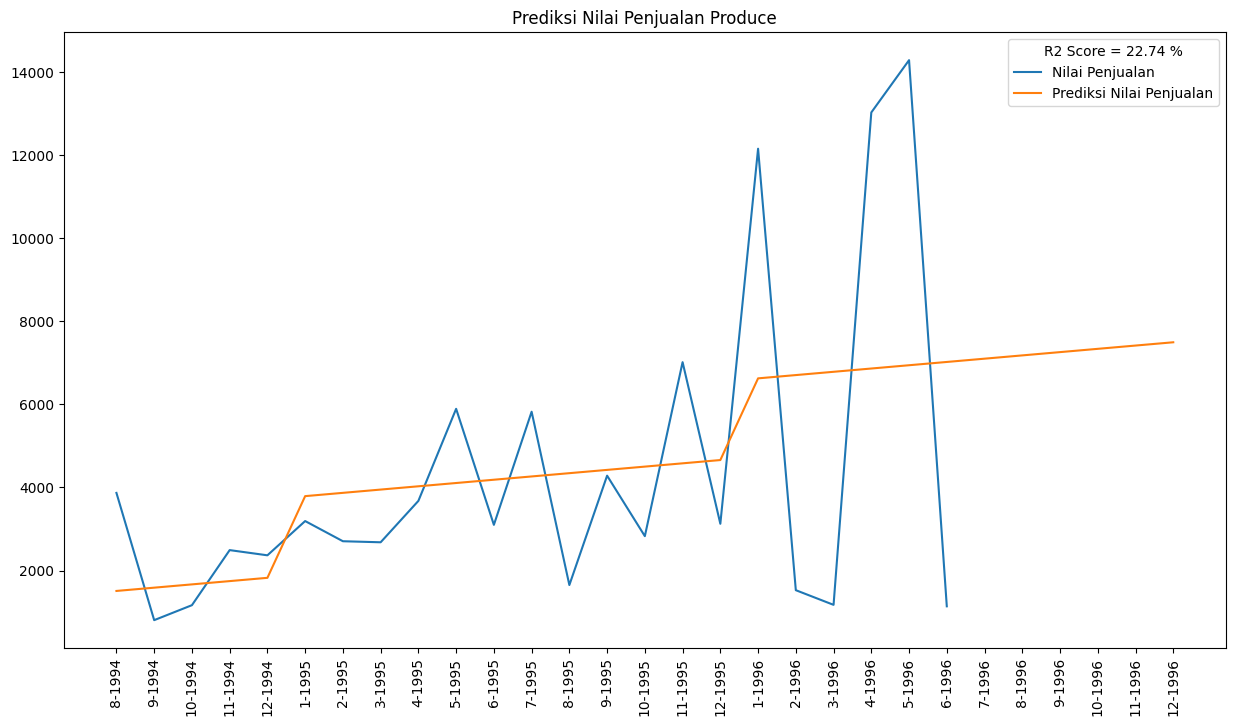

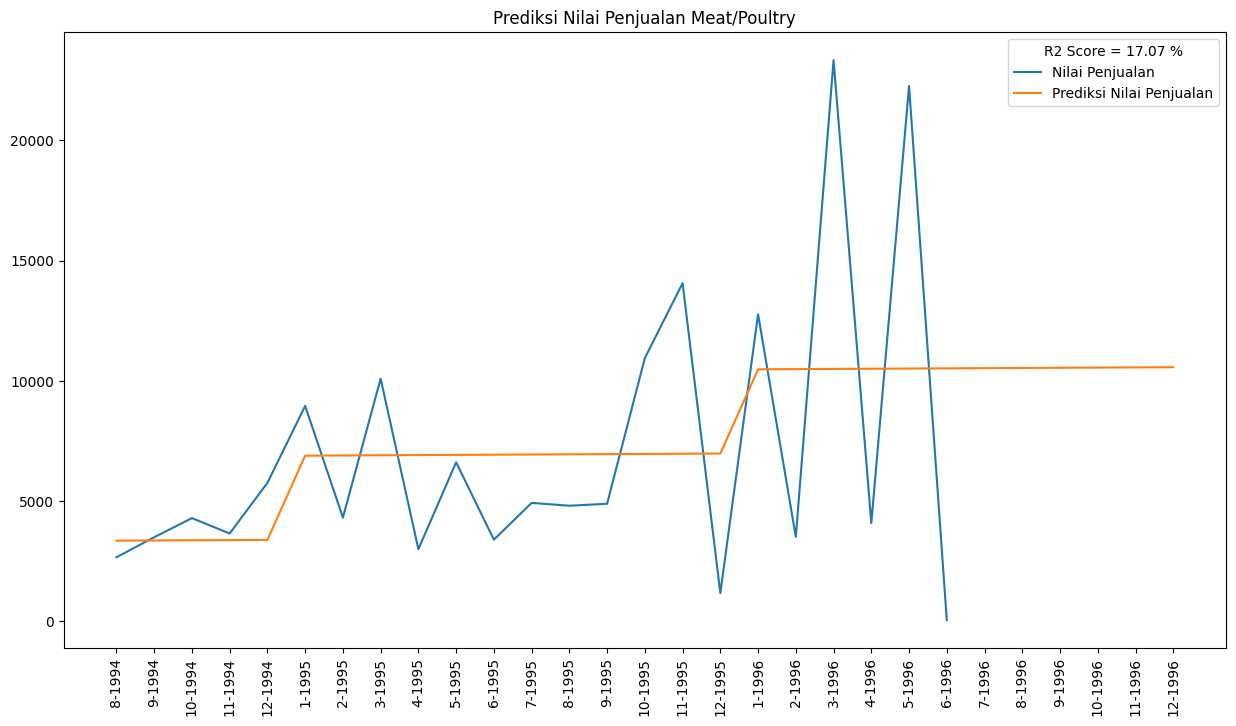

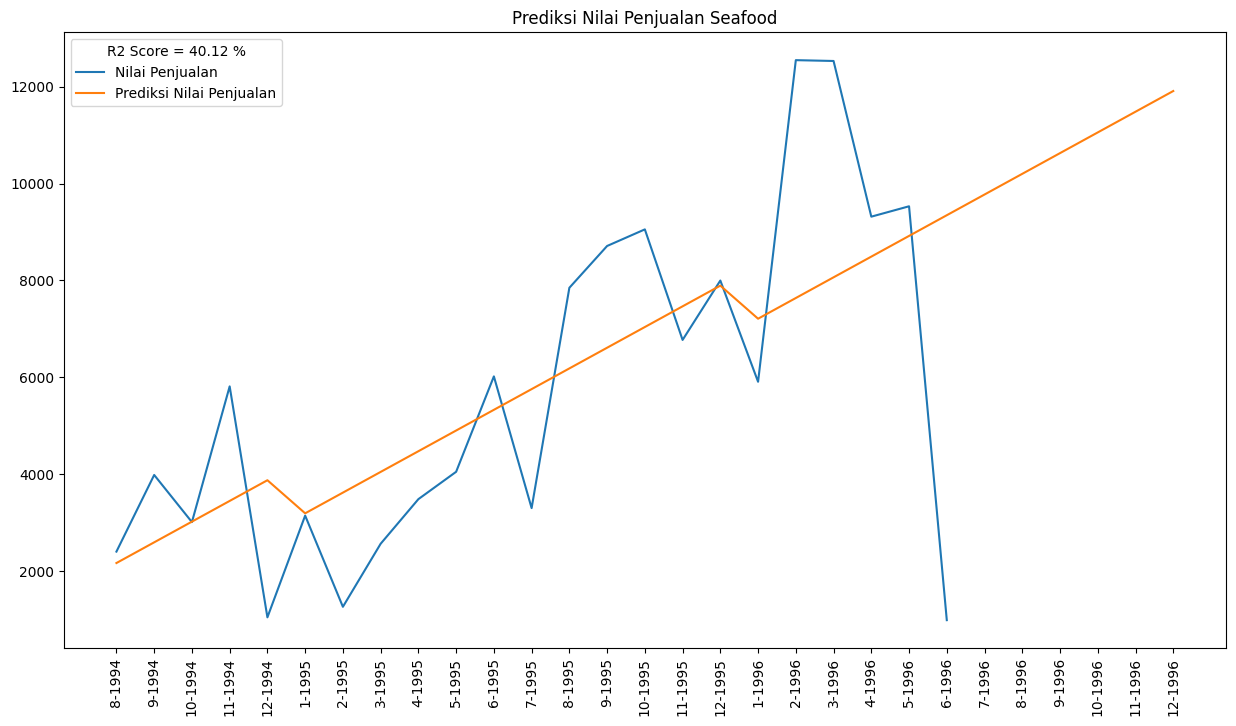

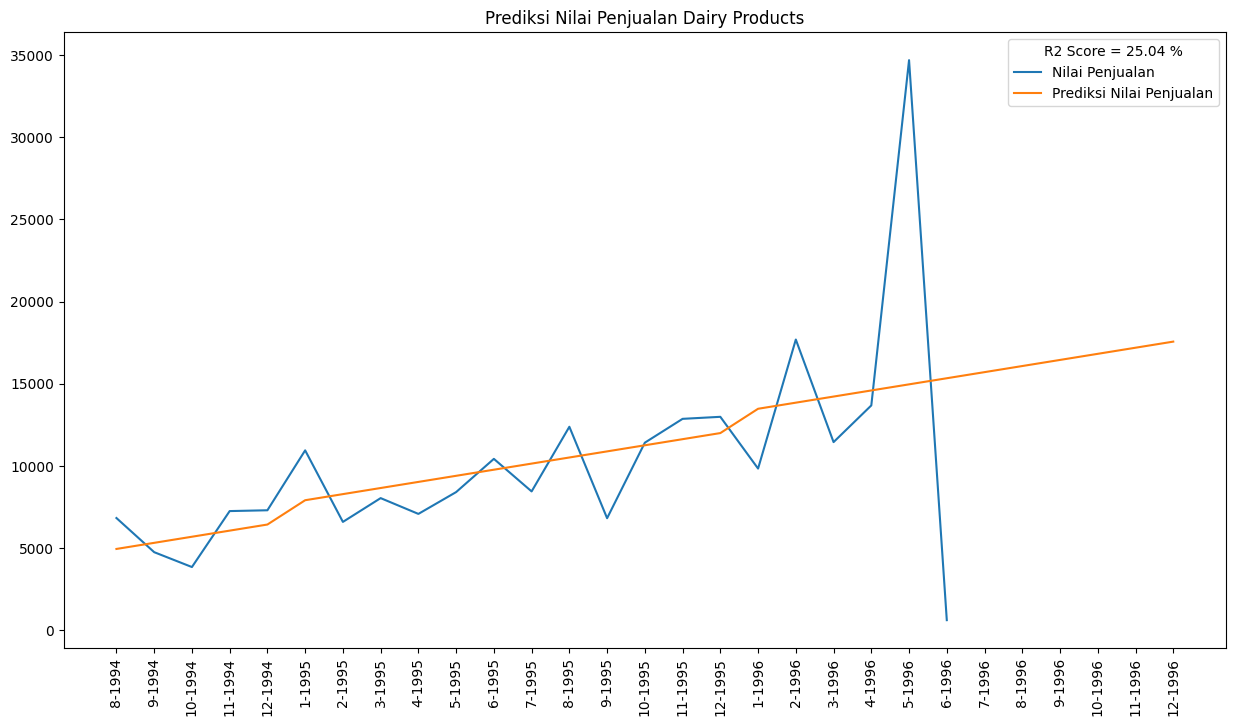

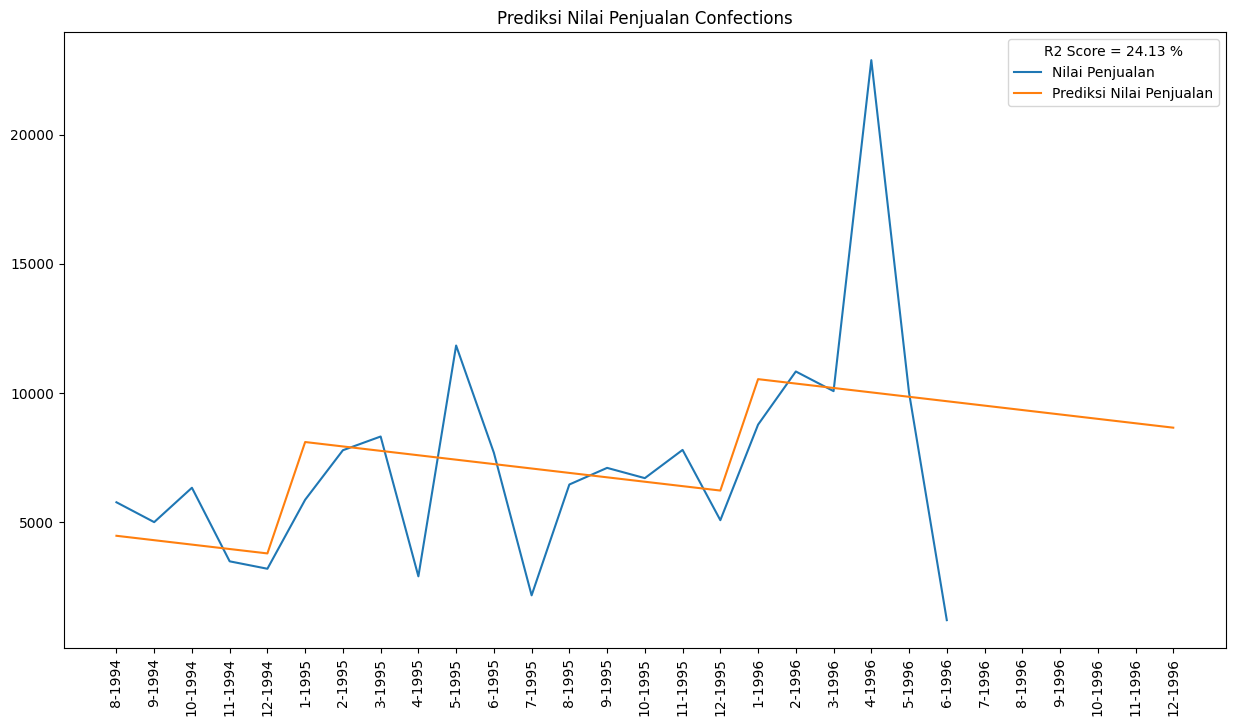

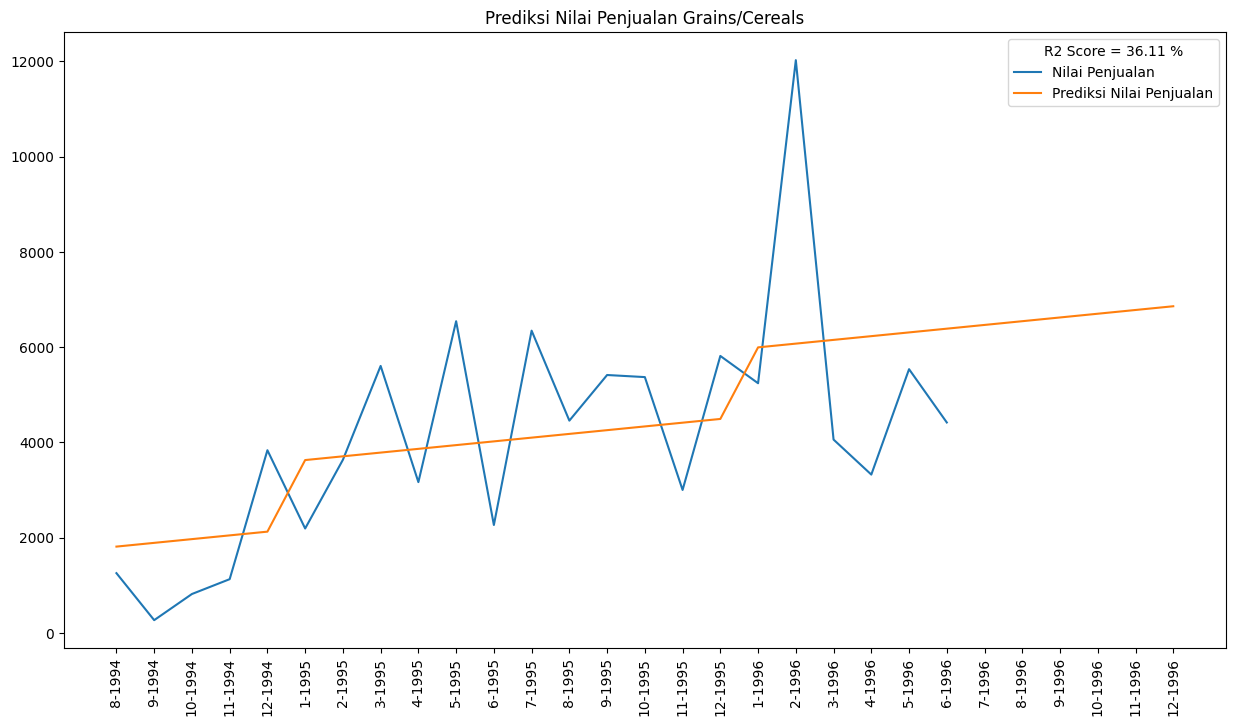

In [99]:
all_categories = products["Category"].unique()
for cat in all_categories:
    the_cat_df = order_order_details_products_groupby[(order_order_details_products_groupby["Category"] == cat)]
    X = the_cat_df[["Order Date Month","Order Date Year"]].values
    y = the_cat_df["Nilai Penjualan"].values
    reg = LinearRegression().fit(X,y)
    prediction_score = reg.score(X,y)*100
    x_test = np.array([
        [7,1996],
        [8,1996],
        [9,1996],
        [10,1996],
        [11,1996],
        [12,1996]
    ])

    x_concat = np.concatenate((X,x_test),axis=0)

    x_label = [f'{i}-{j}' for i,j in x_concat]  
    X_label = [f'{i}-{j}' for i,j in X]

    prediction = reg.predict(x_concat)

    plt.figure(figsize=(15,8))
    plt.plot(X_label,y,label="Nilai Penjualan")
    plt.plot(x_label,prediction,label="Prediksi Nilai Penjualan")
    plt.xticks(rotation=90)
    plt.legend()
    plt.title(f"Prediksi Nilai Penjualan {cat}")
    plt.legend(title=f'R2 Score = {round(prediction_score,2)} %')
    plt.show()

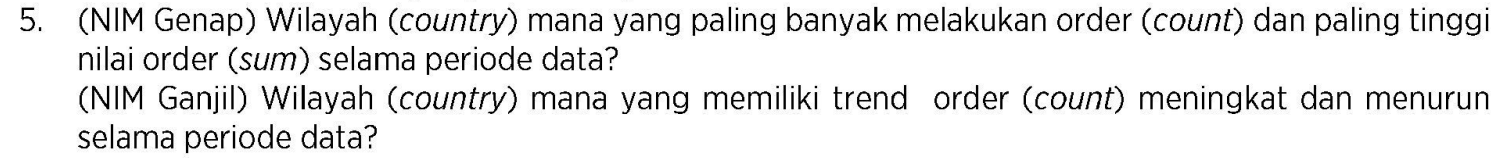

In [100]:
order_order_details_customers = order_order_details.merge(customers,left_on="Customer",right_on="Company Name")
order_order_details_customers.groupby(["Country"]).count().sort_values('Nilai Penjualan',ascending=False)

,Order ID,Customer,Employee,Order Date,Required Date,Shipped Date,Ship Via,Freight,Ship Name,Ship Address,...,Customer ID,Company Name,Contact Name,Contact Title,Address,City,Region,Postal Code,Phone,Fax
Country,,,,,,,,,,,,,,,,,,,,,
USA,352,352,352,352,352,325,352,352,352,352,...,352,352,352,352,352,352,352,352,352,197
Germany,328,328,328,328,328,321,328,328,328,328,...,328,328,328,328,328,328,0,328,328,192
Brazil,203,203,203,203,203,197,203,203,203,203,...,203,203,203,203,203,203,203,203,203,69
France,182,182,182,182,182,178,182,182,182,182,...,182,182,182,182,182,182,0,182,182,182
UK,135,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,135,23,135,135,90
Austria,125,125,125,125,125,118,125,125,125,125,...,125,125,125,125,125,125,0,125,125,125
Venezuela,118,118,118,118,118,110,118,118,118,118,...,118,118,118,118,118,118,118,118,118,118
Sweden,97,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,0,97,97,52
Canada,75,75,75,75,75,73,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75


In [101]:
order_order_details_customers.groupby(["Country"]).sum().sort_values('Nilai Penjualan',ascending=False)

,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price,Quantity,Discount,Nilai Penjualan
Country,,,,,,,,
USA,3764864,5600,2339,702326,10462.91,9330,2094.0,245584.6105
Germany,3487000,5232,2143,654398,8544.84,9213,2070.0,230284.6335
Austria,1332339,1954,680,249408,3469.95,5167,860.0,128003.8385
Brazil,2162294,3342,1149,405033,5324.64,4247,1350.0,106925.7765
France,1935829,2907,1075,363124,4805.81,3224,1005.0,80837.9125
UK,1439114,2049,733,269363,3116.87,2742,310.0,58971.3100
Venezuela,1260576,1941,639,235447,2434.91,2936,790.0,56810.6290
Sweden,1034937,1206,526,193545,2486.49,2235,685.0,54495.1400
Canada,797169,992,418,149640,1907.50,1984,480.0,50196.2900


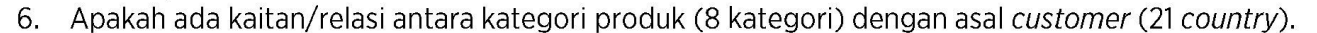

In [102]:
categories_products = categories.merge(products,left_on="Category Name",right_on="Category")
categories_products_order_details_order_customers = categories_products.merge(order_order_details_customers,left_on = "Product Name",right_on="Product")

In [103]:
import numpy as np
ordinalEncoder = OrdinalEncoder()

country_df = np.array(categories_products_order_details_order_customers["Country"]).reshape(-1,1)
country_ordinal_encoder = ordinalEncoder.fit_transform(country_df)

categories_df = np.array(categories_products_order_details_order_customers["Category"]).reshape(-1,1)
categories_ordinal_encoder = ordinalEncoder.fit_transform(categories_df)

In [104]:
categories_products_order_details_order_customers["Country Ordinal"] = country_ordinal_encoder
categories_products_order_details_order_customers["Category Ordinal"] = categories_ordinal_encoder
categories_products_order_details_order_customers["Category Ordinal"].corr(categories_products_order_details_order_customers["Country Ordinal"])

0.02760358198744432

In [105]:
categories_products_order_details_order_customers.groupby(["Country","Category"]).sum()

Category ID  Picture  ProductID  Unit Price_x  \
Country   Category                                                        
Argentina Beverages                 7      0.0        368        381.25   
          Condiments                6      0.0        143         62.85   
          Confections              24      0.0        241        263.18   
          Dairy Products           24      0.0        238        157.80   
          Grains/Cereals            5      0.0         57         19.50   
...                               ...      ...        ...           ...   
Venezuela Dairy Products           92      0.0       1163        761.70   
          Grains/Cereals           45      0.0        439        164.00   
          Meat/Poultry             36      0.0        301        236.04   
          Produce                  56      0.0        341        292.80   
          Seafood                 184      0.0        784        411.22   

                          Units In Stock  Units On Order  Reorder Level  \
Country   Category                                                        
Argentina Beverages                  399              10            125   
          Condiments                 145               0             40   
          Confections                146             150             50   
          Dairy Products             236             140             95   
          Grains/Cereals              36               0             20   
...                                  ...             ...            ...   
Venezuela Dairy Products             650             310            240   
          Grains/Cereals             338             160            195   
          Meat/Poultry               366               0             70   
          Produce                    141              40             40   
          Seafood                   1389             140            300   

                          Discontinued  Order ID  Order Date Day  \
Country   Category                                                 
Argentina Beverages                  0     75964             123   
          Condiments                 1     32660              70   
          Confections                0     85843             167   
          Dairy Products             0     65227             128   
          Grains/Cereals             0     10916              29   
...                                ...       ...             ...   
Venezuela Dairy Products             0    243476             378   
          Grains/Cereals             1     97519             134   
          Meat/Poultry               2     63150             160   
          Produce                    3     85993             150   
          Seafood                    0    247874             367   

                          Order Date Month  Order Date Year  Unit Price_y  \
Country   Category                                                          
Argentina Beverages                     24            13971        381.25   
          Condiments                    19             5987         62.85   
          Confections                   35            15964        254.85   
          Dairy Products                23            11975        157.80   
          Grains/Cereals                 3             1996         19.50   
...                                    ...              ...           ...   
Venezuela Dairy Products               151            45885        693.30   
          Grains/Cereals                35            17962        164.00   
          Meat/Poultry                  25            11970        190.25   
          Produce                       34            15964        278.20   
          Seafood                      116            45898        397.43   

                          Quantity  Discount  Nilai Penjualan  \
Country   Category                                              
Argentina Beverages             82       0.0         1798

In [106]:
# Create a contingency table of Product Category and Customer Country
cont_table = pd.crosstab(categories_products_order_details_order_customers['Category'], categories_products_order_details_order_customers['Country'])

# Apply the chi-squared test to the contingency table
chi2, pval, dof, expected = stats.chi2_contingency(cont_table)

# Print the results
print('Chi-squared statistic:', chi2)
print('P-value:', pval)

Chi-squared statistic: 145.27062658850997
P-value: 0.36285296961683283


In [107]:
cont_table = pd.crosstab(categories_products_order_details_order_customers['Category'], categories_products_order_details_order_customers['Country'])

chi2, p, dof, expected = stats.chi2_contingency(cont_table)

n = min(cont_table.shape)

v = np.sqrt(chi2/(n*(min(n-1, dof-1))))

print("Cramer's V statistic:", v)
print("P-value:", p)

Cramer's V statistic: 1.6106266891920293
P-value: 0.36285296961683283


Berdasarkan ukuran korelasi yang diberikan dan analisis manual yang dilakukan, dapat disimpulkan bahwa terdapat hubungan yang lemah atau tidak ada hubungan sama sekali antara Kategori Produk dan Negara Pelanggan.

Koefisien korelasi yang diperoleh menggunakan fungsi corr hanya sebesar 0.027, menunjukkan adanya korelasi positif yang lemah antara kedua variabel. Begitu juga, uji Chi-squared dan uji Cramer's V juga menunjukkan hubungan yang tidak signifikan dengan nilai p yang lebih besar dari 0,05.

Selain itu, analisis manual menunjukkan bahwa kategori yang paling banyak dan paling sedikit dibeli bervariasi di setiap negara, menunjukkan bahwa negara pelanggan bukanlah faktor yang signifikan dalam menentukan kategori produk.

Oleh karena itu, dapat disimpulkan bahwa kategori produk dan negara pelanggan pada umumnya tidak saling terkait satu sama lain, dan tidak ada bukti kuat yang menunjukkan adanya hubungan yang signifikan antara keduanya.

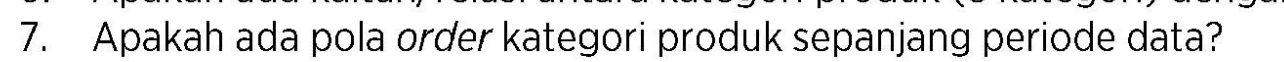

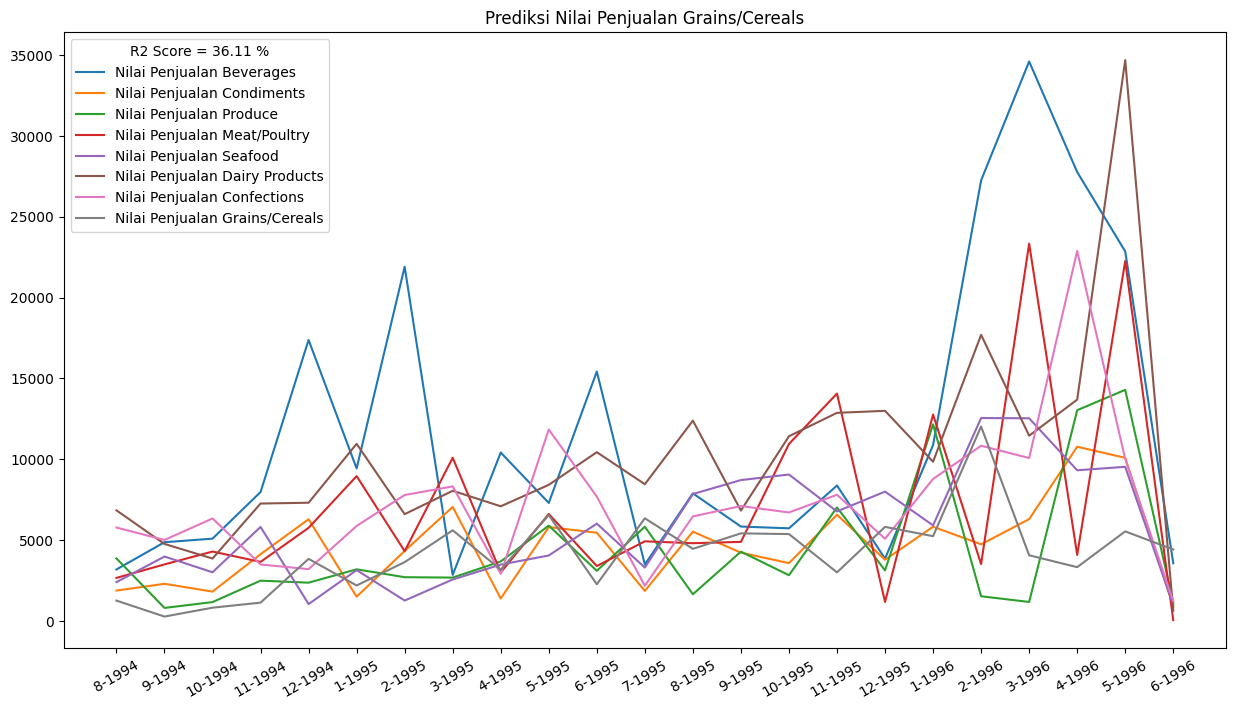

In [108]:
all_categories = products["Category"].unique()
all_y = []
plt.figure(figsize=(15,8))
for cat in all_categories:
    nomor_7_df = order_order_details_products_groupby[(order_order_details_products_groupby["Category"] == cat)]
    X = nomor_7_df[["Order Date Month","Order Date Year"]].values
    y = nomor_7_df["Nilai Penjualan"].values
    
    X_label = [f'{i}-{j}' for i,j in X]
    all_y.append([cat,list(zip(X_label,y))])

    prediction = reg.predict(x_concat)

    plt.plot(X_label,y,label=f"Nilai Penjualan {cat}")

plt.xticks(rotation=30)
plt.legend()
plt.title(f"Prediksi Nilai Penjualan {cat}")
plt.legend(title=f'R2 Score = {round(prediction_score,2)} %')
plt.show()

Pertama, dapat ditemukan bahwa penjualan pada kategori 'Beverages' dan 'Meat/Poultry' mengalami peningkatan pada akhir tahun dan awal tahun baru. Sementara itu, penjualan pada kategori 'Condiments' dan 'Produce' cenderung menurun pada akhir tahun.

Kedua, pola penjualan pada masing-masing kategori juga dapat berbeda-beda, di mana kategori 'Beverages' dan 'Condiments' cenderung memiliki fluktuasi yang lebih besar dibandingkan kategori 'Produce' dan 'Meat/Poultry'.

Dari analisis ini dapat disimpulkan bahwa pola penjualan produk pada setiap kategori dapat berbeda-beda dan dapat dipengaruhi oleh faktor-faktor seperti musim, trend, dan preferensi konsumen. Oleh karena itu, perlu dilakukan analisis lebih lanjut untuk mengoptimalkan strategi penjualan produk pada setiap kategori.

Kategori Beverages mengalami kenaikan penjualan pada bulan Desember 1994 dan Februari 1995, namun mengalami penurunan pada bulan Maret 1995. Kemudian, kembali mengalami kenaikan pada bulan Juni 1995, namun penurunan pada bulan Juli 1995 dan Maret 1996.
Kategori Condiments mengalami kenaikan penjualan pada bulan November 1994, Desember 1994, Februari 1995, Maret 1995, dan November 1995. Namun, mengalami penurunan pada bulan September 1994, Oktober 1994, Juli 1995, dan Januari 1996.
Kategori Produce mengalami kenaikan penjualan pada bulan November 1994, Mei 1995, Juli 1995, November 1995, dan Mei 1996. Namun, mengalami penurunan pada bulan September 1994, Oktober 1994, Desember 1994, Agustus 1995, Oktober 1995, Maret 1996, dan Juni 1996.
Kategori Meat/Poultry mengalami kenaikan penjualan pada bulan Agustus 1994, November 1994, Januari 1995, Maret 1995, Juni 1995, dan Maret 1996. Namun, mengalami penurunan pada bulan September 1994, Oktober 1994, Desember 1994, Mei 1995, dan September 1995.

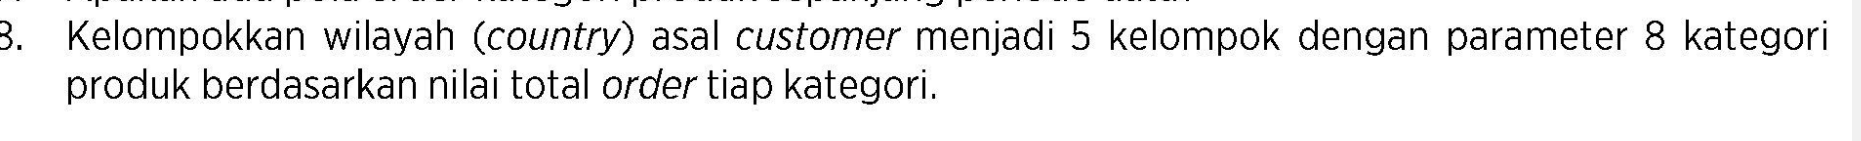

In [110]:
categories_products_order_details_order_customers.groupby(["Country"]).sum().sort_values("Nilai Penjualan",ascending=False)

,Category ID,Picture,ProductID,Unit Price_x,Units In Stock,Units On Order,Reorder Level,Discontinued,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price_y,Quantity,Discount,Nilai Penjualan,Country Ordinal,Category Ordinal
Country,,,,,,,,,,,,,,,,,,
USA,1470,0.0,14144,11071.86,13860,2710,4050,39,3764864,5600,2339,702326,10462.91,9330,2094.0,245584.6105,6688.0,1118.0
Germany,1342,0.0,13409,9003.81,13357,2810,3900,26,3487000,5232,2143,654398,8544.84,9213,2070.0,230284.6335,2624.0,1014.0
Austria,498,0.0,4832,3771.13,4482,1620,1490,20,1332339,1954,680,249408,3469.95,5167,860.0,128003.8385,125.0,373.0
Brazil,821,0.0,8053,5690.69,8608,1230,2365,19,2162294,3342,1149,405033,5324.64,4247,1350.0,106925.7765,609.0,618.0
France,788,0.0,7429,5200.05,7851,1190,2230,16,1935829,2907,1075,363124,4805.81,3224,1005.0,80837.9125,1274.0,606.0
UK,567,0.0,5467,3306.51,4849,1360,1790,12,1439114,2049,733,269363,3116.87,2742,310.0,58971.3100,2430.0,432.0
Venezuela,508,0.0,4813,2633.55,4767,1120,1570,9,1260576,1941,639,235447,2434.91,2936,790.0,56810.6290,2360.0,390.0
Sweden,400,0.0,4150,2606.06,4449,610,1145,8,1034937,1206,526,193545,2486.49,2235,685.0,54495.1400,1552.0,303.0
Canada,291,0.0,2975,2105.55,2934,510,895,8,797169,992,418,149640,1907.50,1984,480.0,50196.2900,300.0,216.0


In [111]:
# Normalisasi data dengan StandardScaler
scaler = StandardScaler()

normalized_df = pd.DataFrame(scaler.fit_transform(categories_products_order_details_order_customers[['Nilai Penjualan']]))

# Melakukan k-means clustering dengan jumlah klaster = 5
kmeans = KMeans(n_clusters=5, random_state=0).fit(normalized_df)

# Menambahkan kolom klaster pada DataFrame
categories_products_order_details_order_customers['Cluster'] = kmeans.fit_predict(normalized_df)
categories_products_order_details_order_customers.groupby(["Cluster","Country"]).sum()

Category ID  Picture  ProductID  Unit Price_x  \
Cluster Country                                                      
0       Argentina            131      0.0       1340       1016.48   
        Austria              273      0.0       2515       1233.73   
        Belgium              149      0.0       1741        696.18   
        Brazil               668      0.0       6486       3007.51   
        Canada               197      0.0       1957        998.55   
...                          ...      ...        ...           ...   
4       Sweden                18      0.0        247        455.50   
        Switzerland            6      0.0         53         32.80   
        UK                    13      0.0        109        238.79   
        USA                   81      0.0        753       1700.07   
        Venezuela             16      0.0        249        199.80   

                     Units In Stock  Units On Order  Reorder Level  \
Cluster Country                                                      
0       Argentina              1446             300            400   
        Austria                2140            1180            885   
        Belgium                1444             340            555   
        Brazil                 7409            1120           2035   
        Canada                 2168             480            690   
...                             ...             ...            ...   
4       Sweden                  154              20             80   
        Switzerland               0               0              0   
        UK                       59               0              0   
        USA                     569              10            130   
        Venezuela               251               0              0   

                     Discontinued  Order ID  Order Date Day  Order Date Month  \
Cluster Country                                                                 
0       Argentina               2    356411             645               140   
        Austria                10    733656            1120               383   
        Belgium                 4    410154             571               158   
        Brazil                 14   1746104            2638               957   
        Canada                  6    552540             663               267   
...                           ...       ...             ...               ...   
4       Sweden                  0     53222              42                35   
        Switzerland             1     11033              17                 5   
        UK                      1     31712              38                18   
        USA                     6    200934             374               119   
        Venezuela               0     42552              46                24   

                     Order Date Year  Unit Price_y  Quantity  Discount  \
Cluster Country                                                          
0       Argentina              65857        999.80       324       0.0   
        Austria               137668       1128.68      2003     440.0   
        Belgium                75835        668.08       739     150.0   
        Brazil                327215       2826.21      2962    1130.0   
        Canada                103752        915.70      1013     320.0   
...                              ...           ...       ...       ...   
4       Sweden                  9976        455.50       220      10.0   
        Switzerland             1996         32.80        70      10.0   
        UK                      5985        207.20       151      10.0   
        USA                    37905       1530.90      1181      95.0   
        Venezuela               7981        188.80       195      10.0   

                     Nilai Penjualan  Country Ordinal  Category Ordinal  
Cluster Country                                                          
0       Argentina          6904.10